In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('breastCancer.csv')
df.head(5)

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [99]:
df.shape

(699, 11)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [101]:
df = df.drop(columns = ['id'])

In [102]:
df['bare_nucleoli'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64

In [103]:
import numpy as np
df_absent = df[df['bare_nucleoli']=='?']
df_absent = df_absent.reset_index()
df_absent = df_absent.drop(columns=['index'])
df_absent

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,8,4,5,1,2,?,7,3,1,4
1,6,6,6,9,6,?,7,8,1,2
2,1,1,1,1,1,?,2,1,1,2
3,1,1,3,1,2,?,2,1,1,2
4,1,1,2,1,3,?,1,1,1,2
5,5,1,1,1,2,?,3,1,1,2
6,3,1,4,1,2,?,3,1,1,2
7,3,1,1,1,2,?,3,1,1,2
8,3,1,3,1,2,?,2,1,1,2
9,8,8,8,1,2,?,6,10,1,4


In [104]:
df_present = df[df['bare_nucleoli']!='?']
df_present = df_present.reset_index()
df_present = df_present.drop(columns=["index"])
df_present = df_present.astype(np.float64)
df_present.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


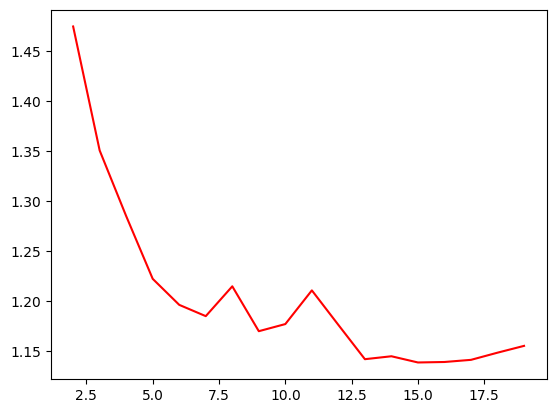

Best k parameter is  15


In [105]:
df_present_temp = df_present.drop(columns=['bare_nucleoli'])
xm = df_present_temp.values
ym = df_present['bare_nucleoli'].values

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(xm, ym, test_size=0.2, random_state=4)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

k_min = 2
test_MAE_array = []
k_array = []
MAE = 2

for k in range(2, 20):
    model = KNeighborsRegressor(n_neighbors=k).fit(train_x, train_y)
    
    y_predict = model.predict(test_x)
    y_true = test_y

    test_MAE = mean_absolute_error(y_true, y_predict)
    if test_MAE < MAE:
        MAE = test_MAE
        k_min = k

    test_MAE_array.append(test_MAE)
    k_array.append(k)

plt.plot(k_array, test_MAE_array,'r')
plt.show()
print("Best k parameter is ",k_min )

In [106]:
final_model = KNeighborsRegressor(n_neighbors=16).fit(xm,ym)

df_absent_temp = df_absent.drop(columns=['bare_nucleoli'])
df_absent_temp = df_absent_temp.astype(np.float64)
df_absent_temp.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
0,8.0,4.0,5.0,1.0,2.0,7.0,3.0,1.0,4.0
1,6.0,6.0,6.0,9.0,6.0,7.0,8.0,1.0,2.0
2,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0
3,1.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0,2.0
4,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,2.0


In [107]:
x_am = df_absent_temp.values
y_am = final_model.predict(x_am)
y_am

array([6.8125, 8.375 , 1.0625, 1.    , 1.1875, 1.    , 1.    , 1.1875,
       1.1875, 7.5   , 1.0625, 1.4375, 7.1875, 1.1875, 1.0625, 1.5   ])

In [108]:
y_am = np.round(y_am)
y_am = y_am.astype(np.int64)
y_am

array([7, 8, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 7, 1, 1, 2])

In [109]:
df_pred = pd.DataFrame({'bare_nucleoli':y_am})
df_pred

,bare_nucleoli
0,7
1,8
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,8


In [110]:
data_frame1 =  df_absent_temp.join(df_pred)
data_frame1 = data_frame1.astype(np.int64)
data_frame1

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class,bare_nucleoli
0,8,4,5,1,2,7,3,1,4,7
1,6,6,6,9,6,7,8,1,2,8
2,1,1,1,1,1,2,1,1,2,1
3,1,1,3,1,2,2,1,1,2,1
4,1,1,2,1,3,1,1,1,2,1
5,5,1,1,1,2,3,1,1,2,1
6,3,1,4,1,2,3,1,1,2,1
7,3,1,1,1,2,3,1,1,2,1
8,3,1,3,1,2,2,1,1,2,1
9,8,8,8,1,2,6,10,1,4,8


In [111]:
df_join_2 = df_present['bare_nucleoli']
data_frame_2 = df_present_temp.join(df_join_2)
data_frame_2 = data_frame_2.astype(np.int64)
data_frame_2.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class,bare_nucleoli
0,5,1,1,1,2,3,1,1,2,1
1,5,4,4,5,7,3,2,1,2,10
2,3,1,1,1,2,3,1,1,2,2
3,6,8,8,1,3,3,7,1,2,4
4,4,1,1,3,2,3,1,1,2,1


In [112]:
dataset = [data_frame1, data_frame_2]
dataset = pd.concat(dataset)
dataset.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class,bare_nucleoli
0,8,4,5,1,2,7,3,1,4,7
1,6,6,6,9,6,7,8,1,2,8
2,1,1,1,1,1,2,1,1,2,1
3,1,1,3,1,2,2,1,1,2,1
4,1,1,2,1,3,1,1,1,2,1


In [113]:
dataset.columns

Index(['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bland_chromatin',
       'normal_nucleoli', 'mitoses', 'class', 'bare_nucleoli'],
      dtype='object')

In [114]:
cols = ['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bland_chromatin',
       'normal_nucleoli', 'mitoses', 'bare_nucleoli', 'class']
dataset = dataset[cols]
dataset.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,bare_nucleoli,class
0,8,4,5,1,2,7,3,1,7,4
1,6,6,6,9,6,7,8,1,8,2
2,1,1,1,1,1,2,1,1,1,2
3,1,1,3,1,2,2,1,1,1,2
4,1,1,2,1,3,1,1,1,1,2


In [115]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
dataset.iloc[:,9] = labelencoder_Y.fit_transform(dataset.iloc[:,9].values)
dataset.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,bare_nucleoli,class
0,8,4,5,1,2,7,3,1,7,1
1,6,6,6,9,6,7,8,1,8,0
2,1,1,1,1,1,2,1,1,1,0
3,1,1,3,1,2,2,1,1,1,0
4,1,1,2,1,3,1,1,1,1,0


In [116]:
dataset['class'].value_counts()

0    458
1    241
Name: class, dtype: int64

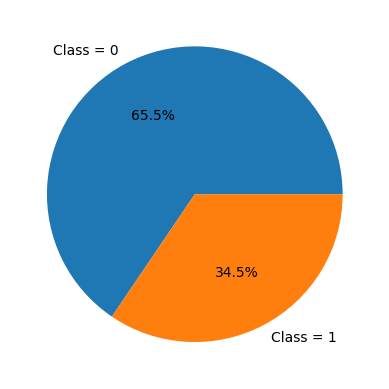

In [117]:
fig, ax = plt.subplots(1,1)
ax.pie(dataset['class'].value_counts(),autopct='%1.1f%%', labels=['Class = 0','Class = 1'])
plt.axis = 'equal'

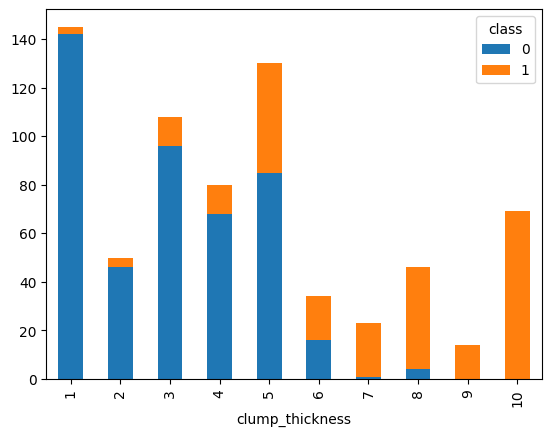

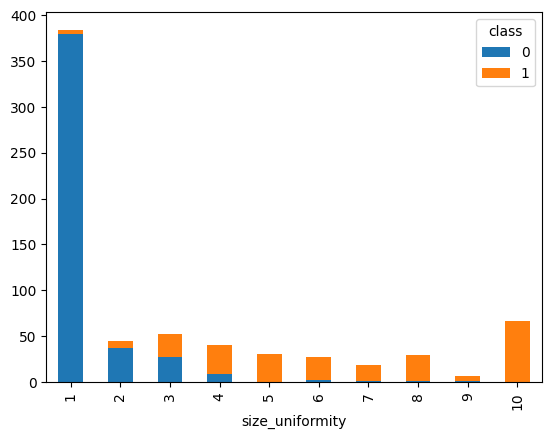

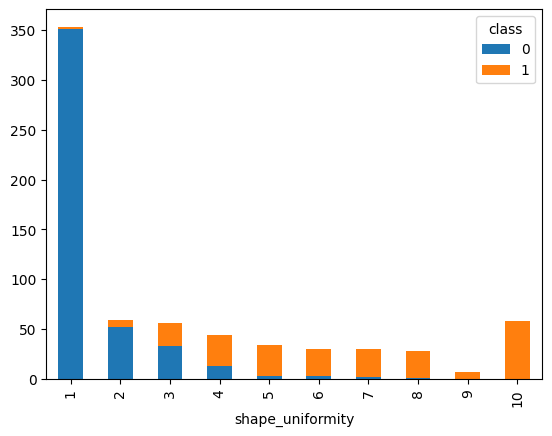

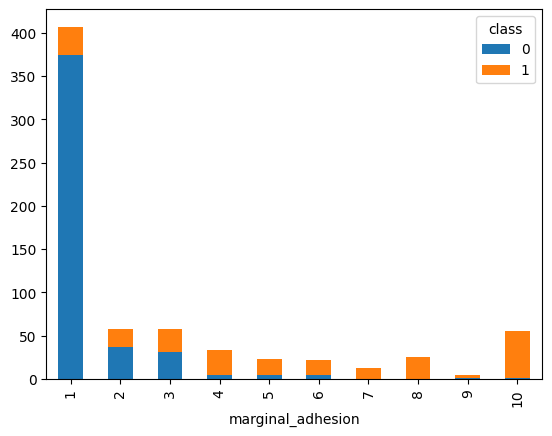

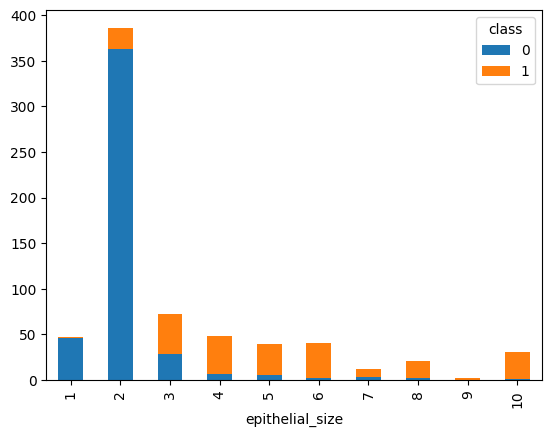

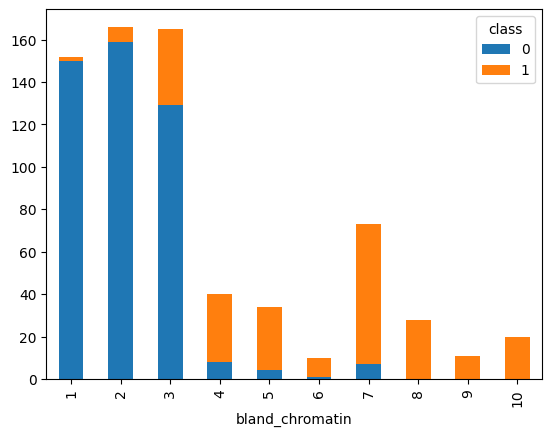

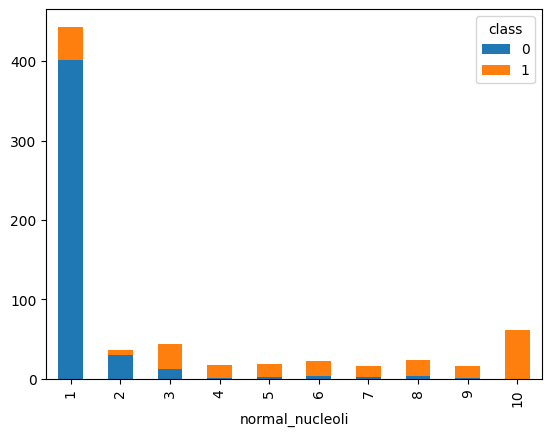

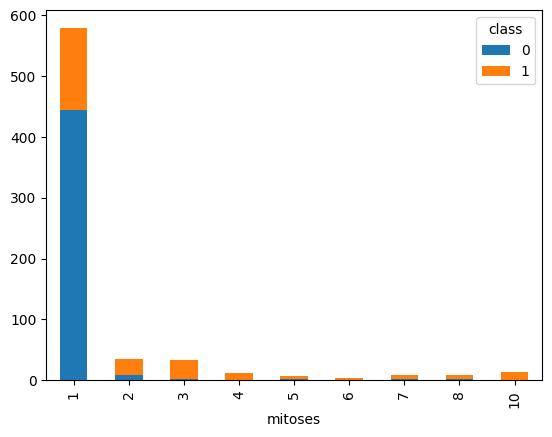

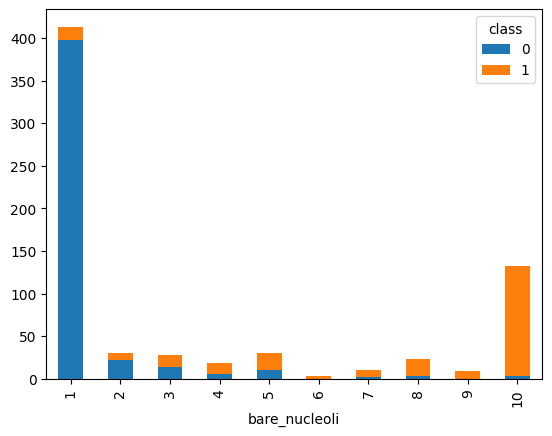

In [118]:
for i in range(9):
    column = dataset.iloc[:,i]
    graph = pd.crosstab(column,dataset['class'])
    graph.plot.bar(stacked=True)
    plt.show()

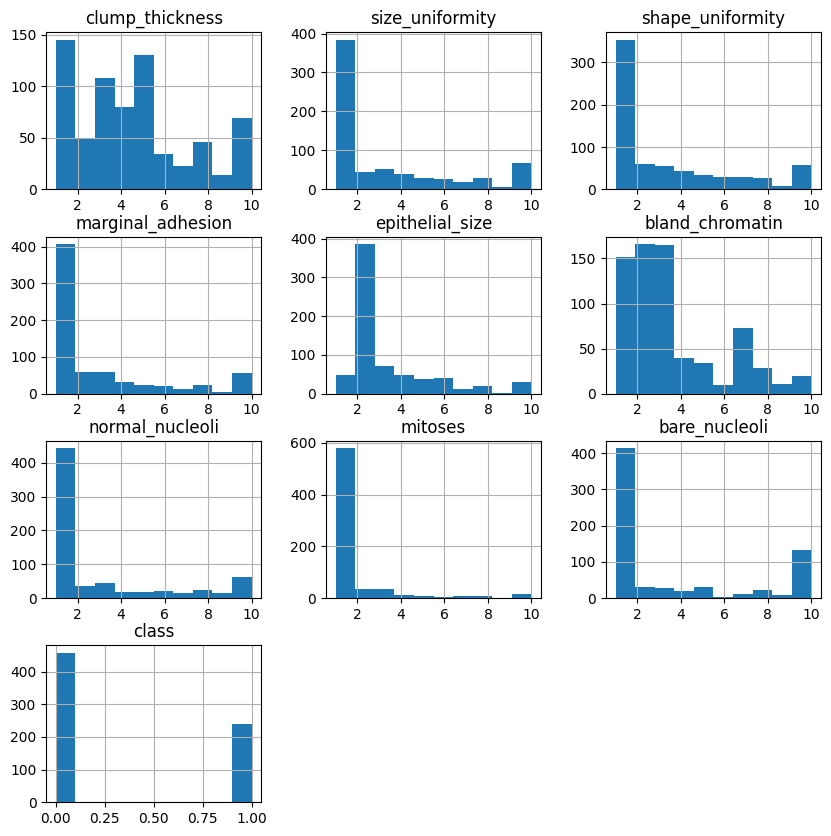

In [119]:
dataset.hist(figsize = (10, 10))
plt.show()

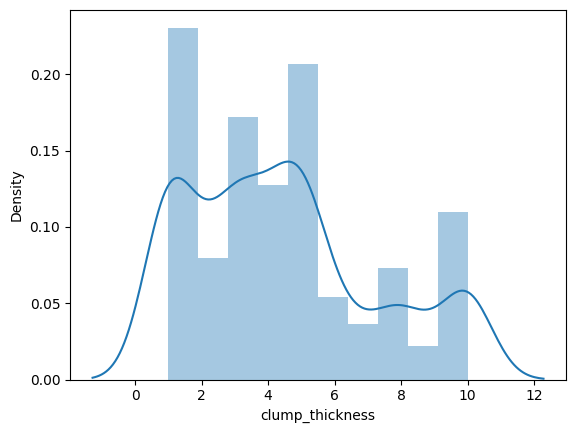

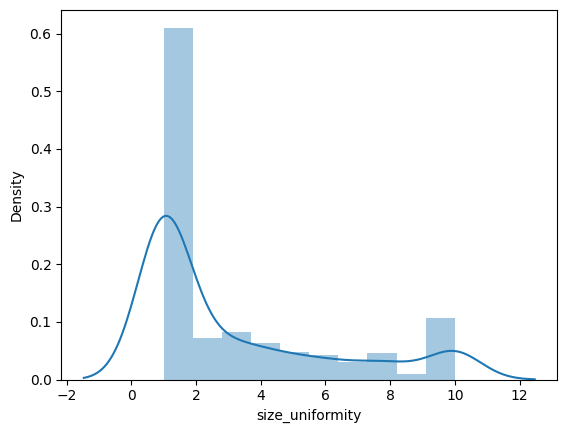

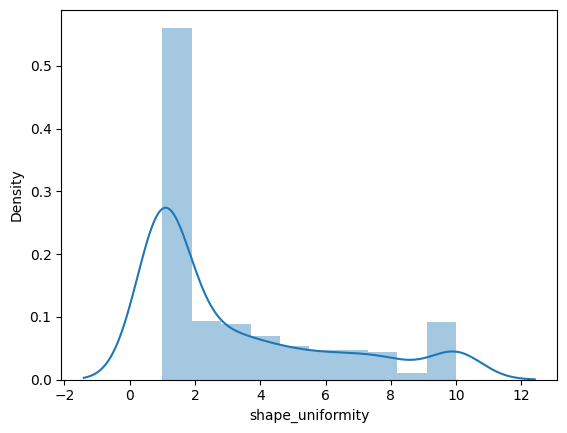

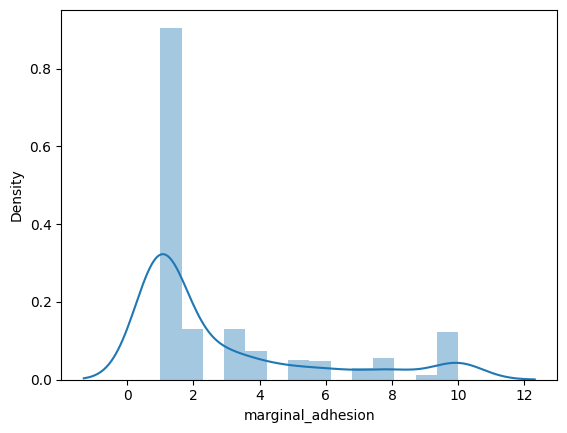

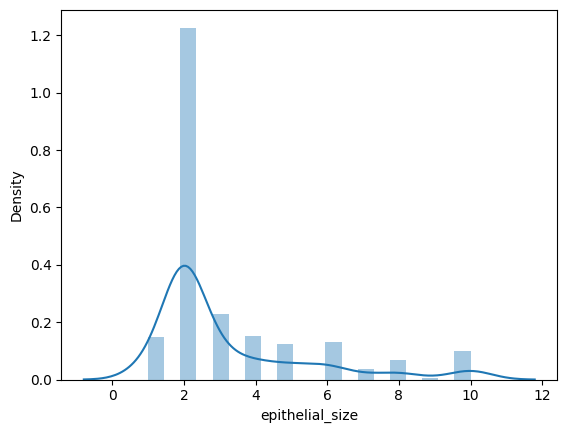

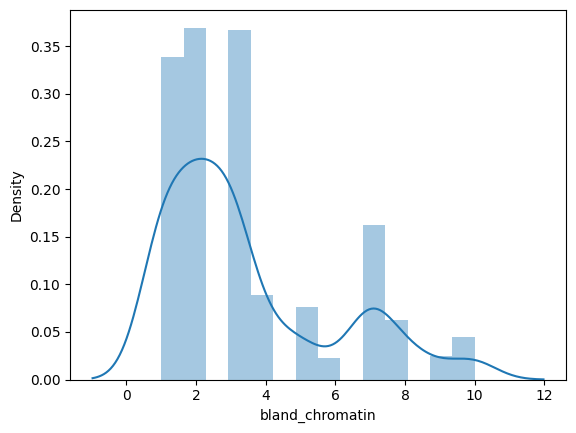

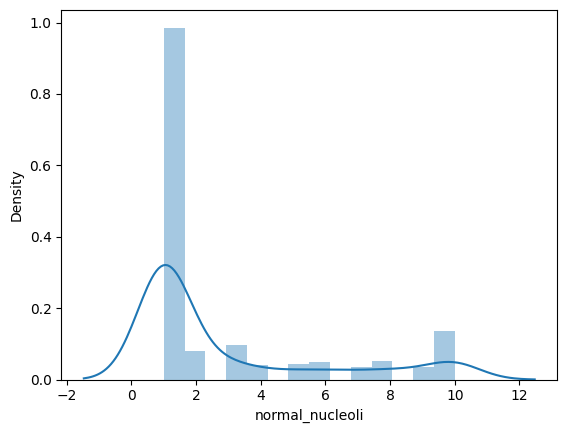

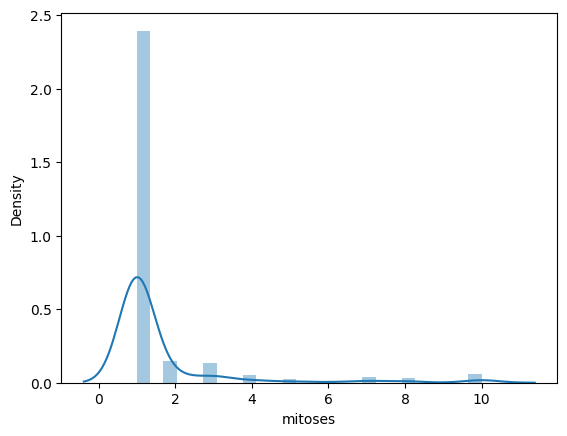

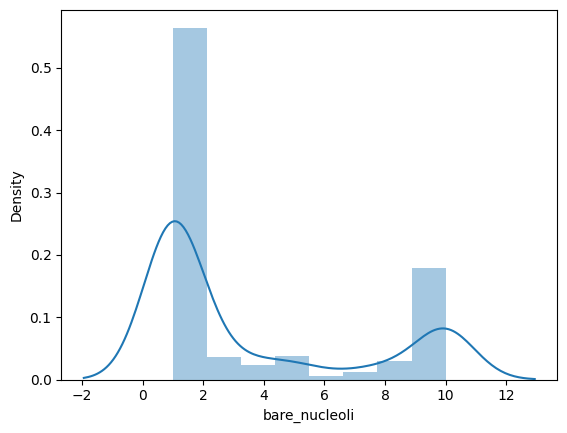

In [120]:
for i in range(9):
    distribution = dataset.iloc[:,i]
    graph = sb.distplot(distribution)
    plt.show()

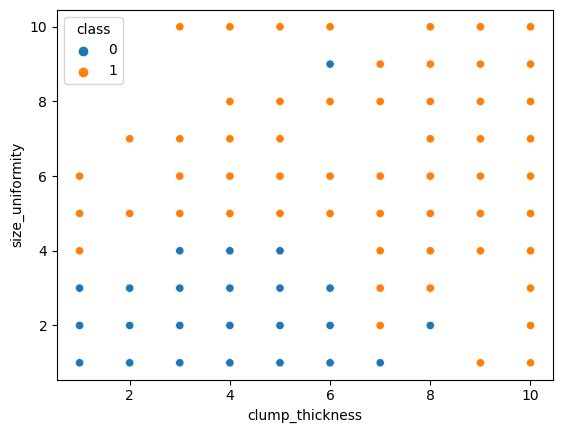

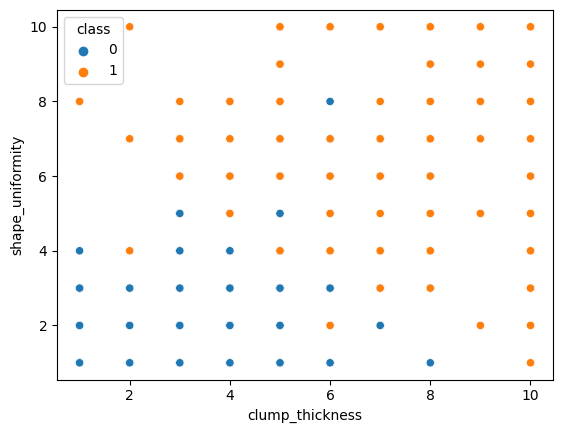

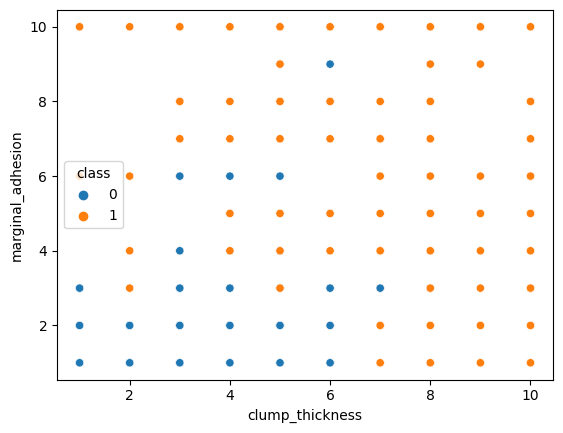

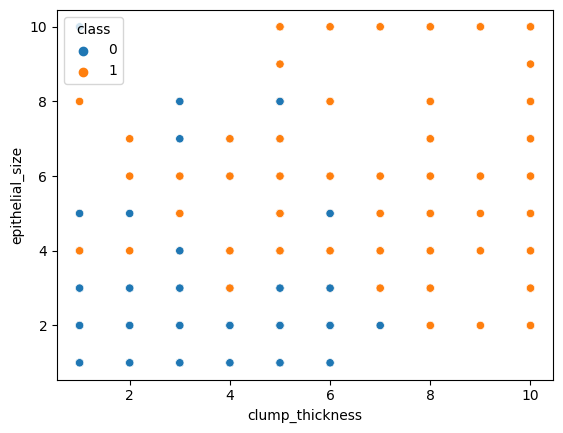

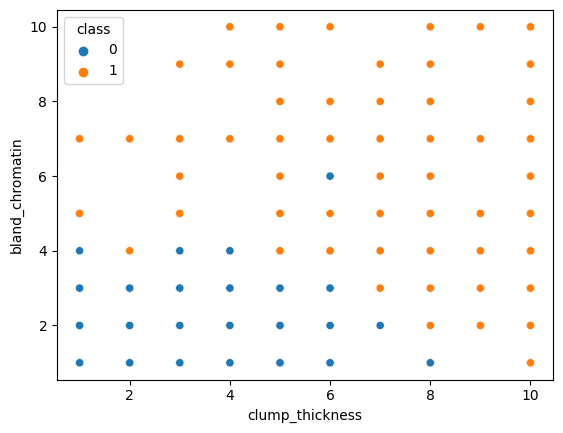

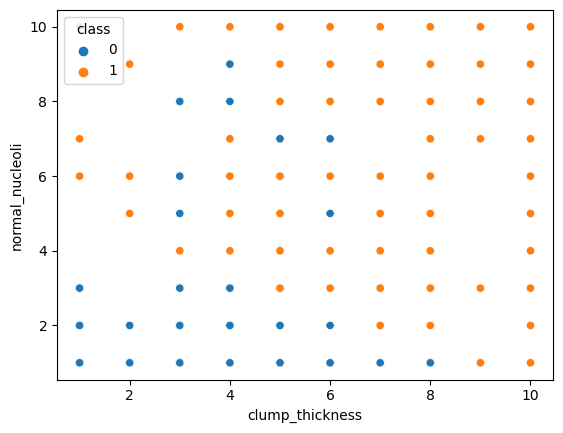

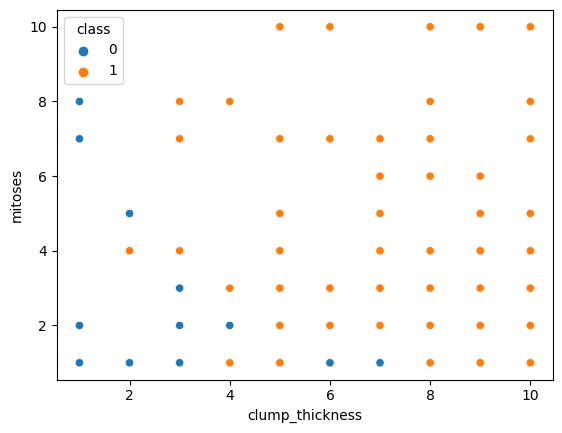

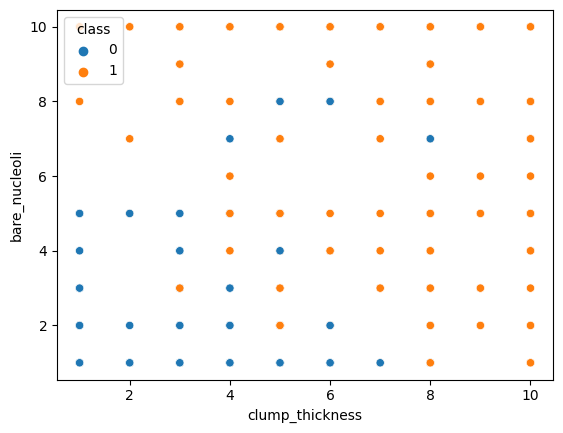

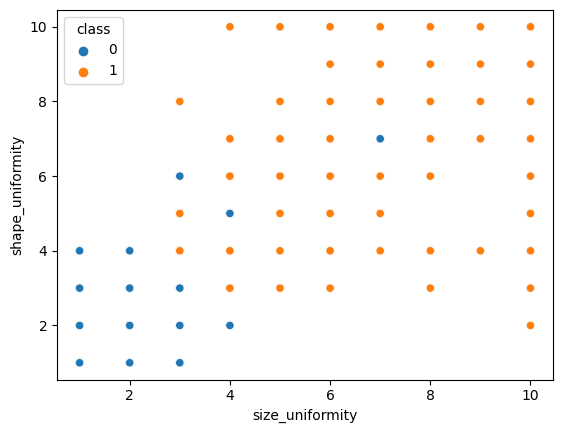

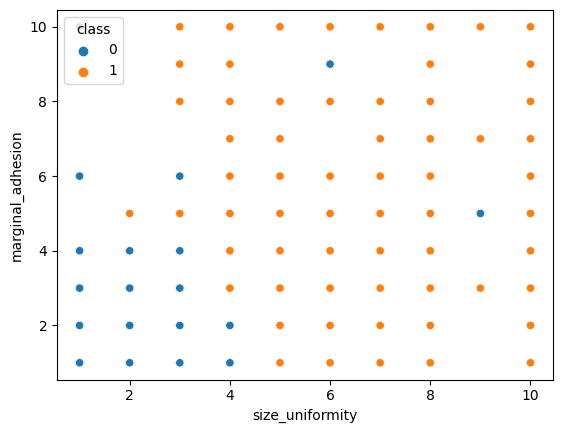

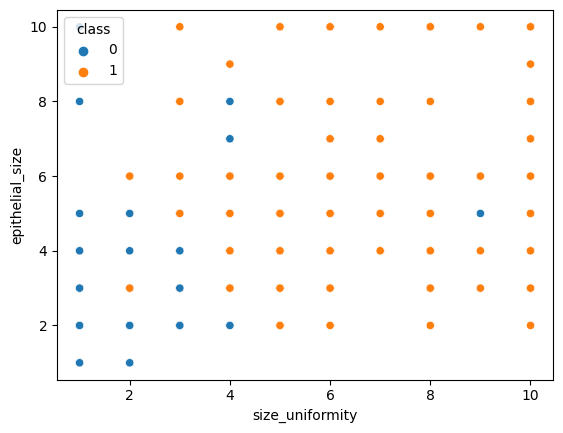

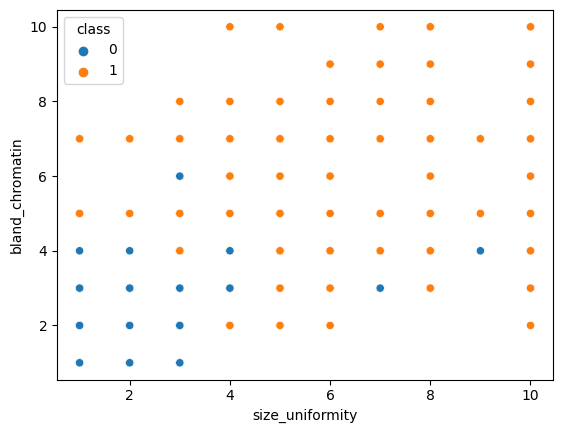

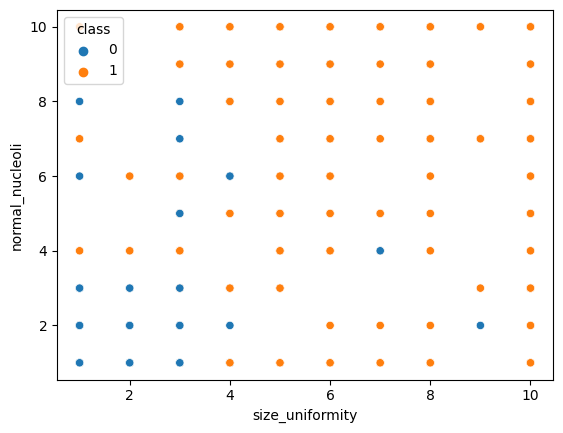

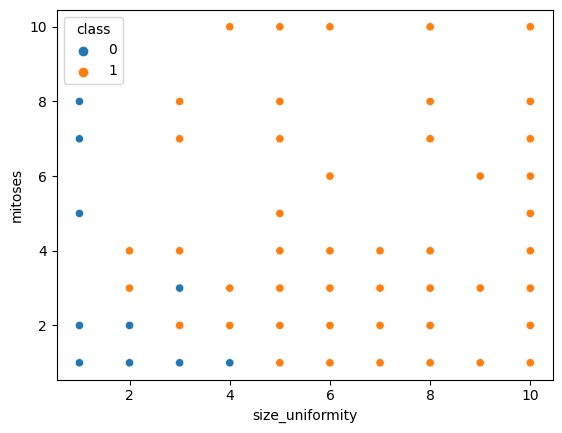

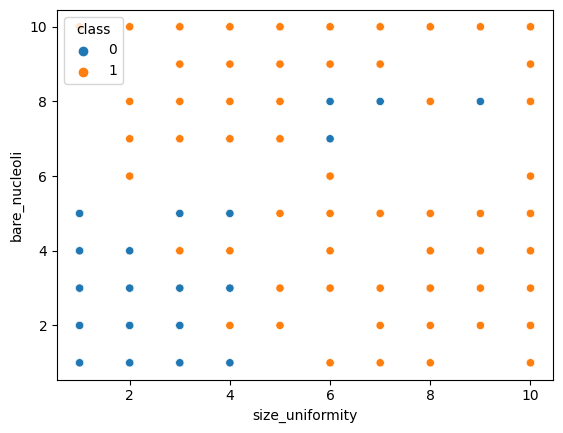

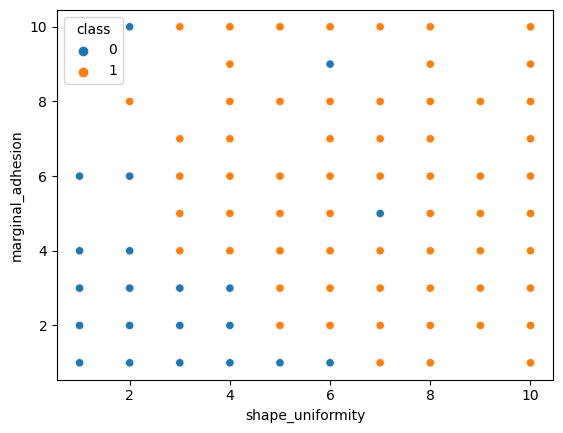

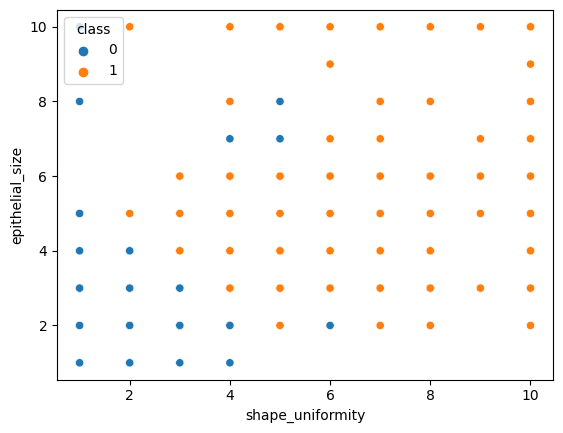

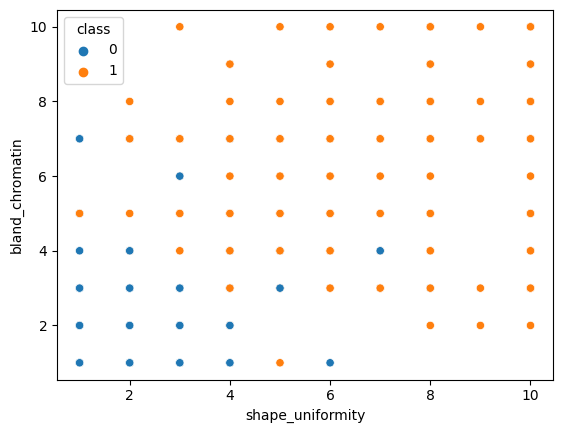

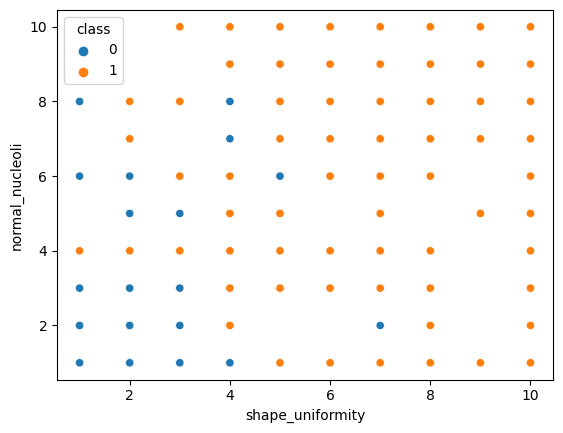

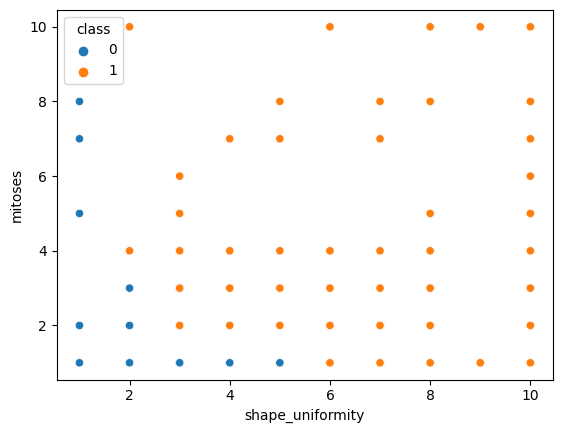

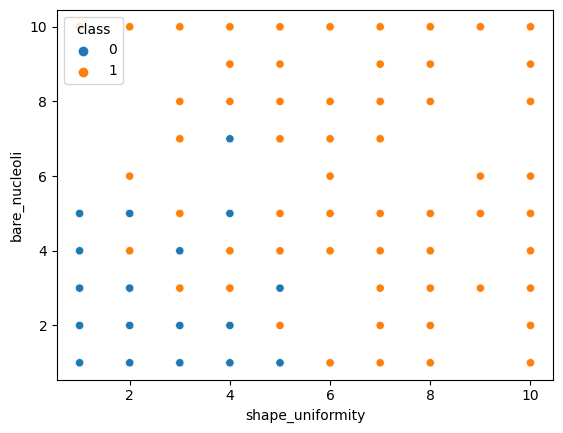

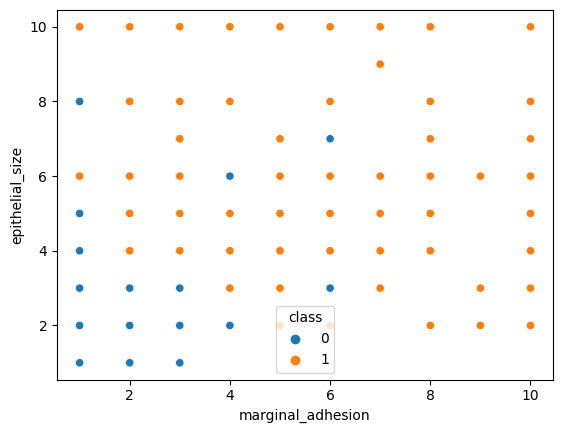

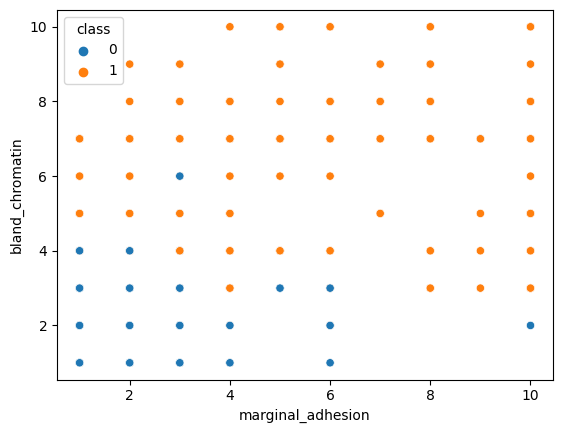

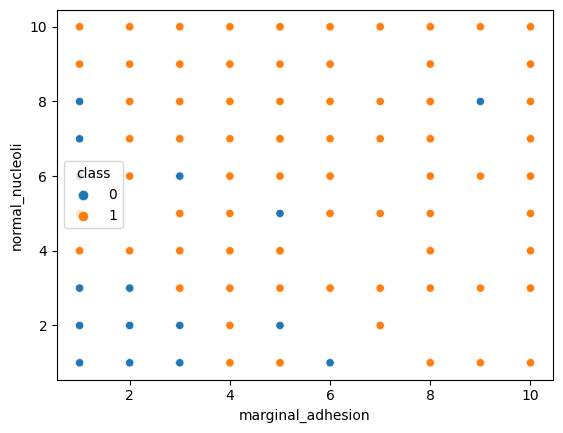

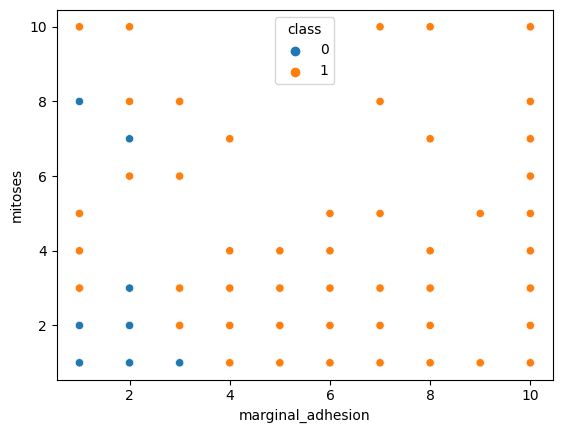

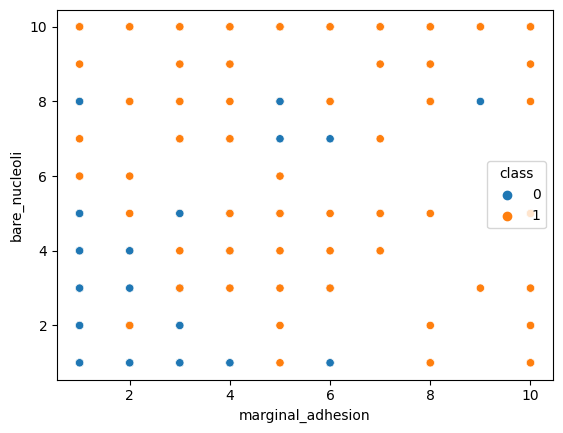

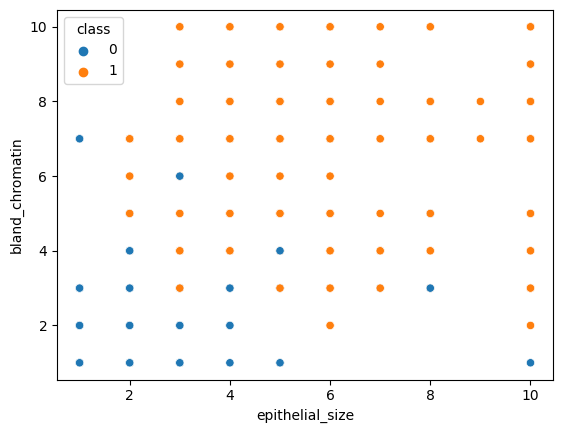

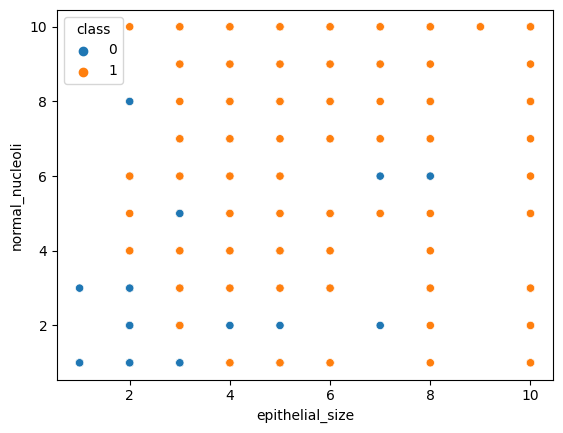

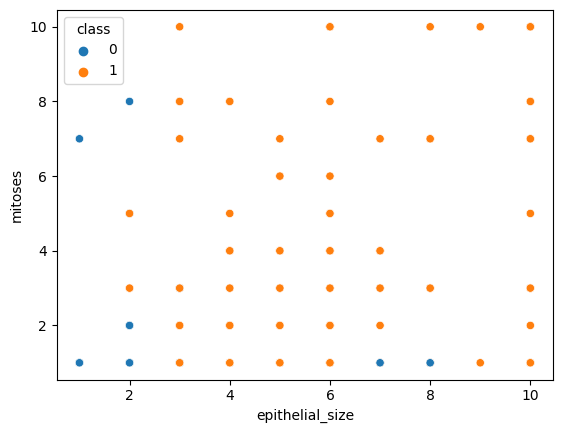

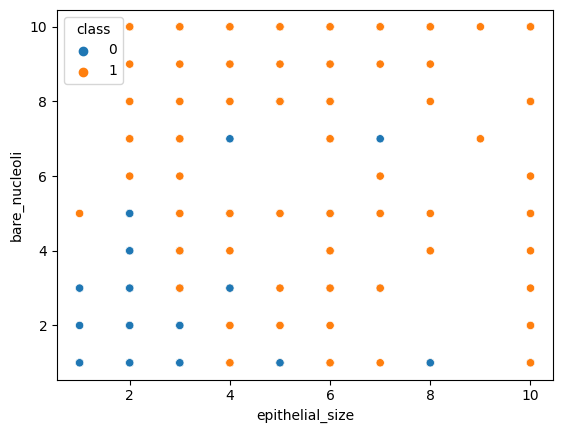

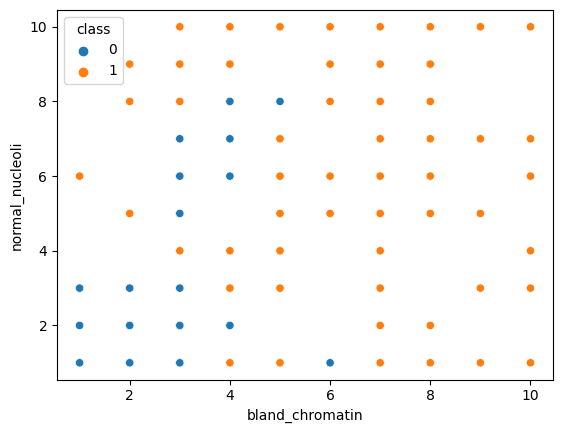

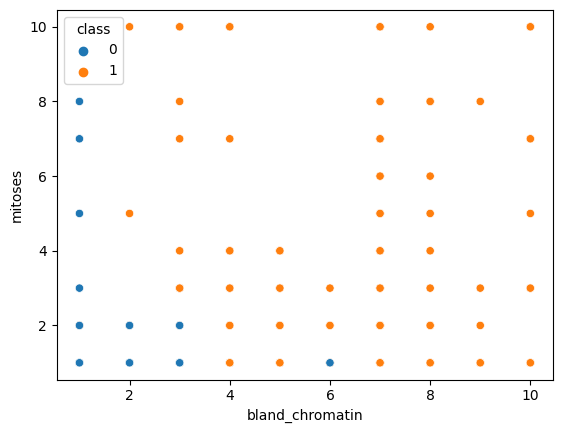

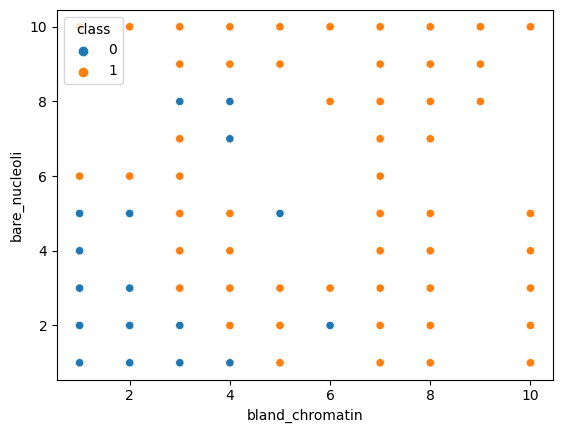

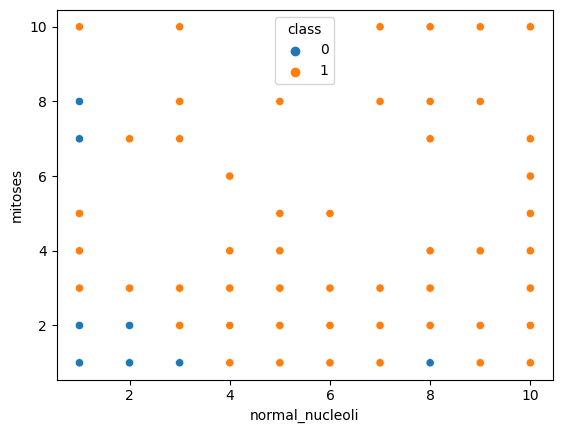

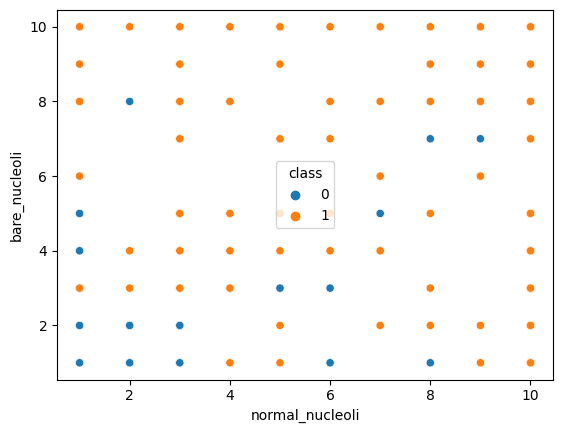

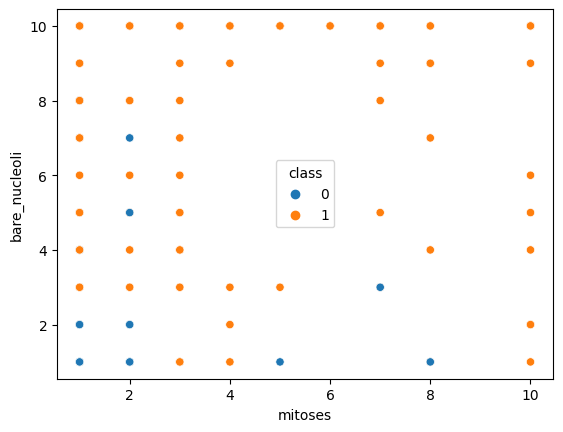

In [121]:
for i in range(9):
    x = dataset.iloc[:,i]
    for j in range(i+1,9):
        y = dataset.iloc[:,j]
        hue_parameter = dataset['class']
        ax = sb.scatterplot(x=x, y=y, hue=hue_parameter)
        plt.show()

In [122]:
dataset.iloc[:,0:10].corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,bare_nucleoli,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.596113,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.694960,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.715716,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.670820,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.586876,0.682785
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.683458,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.589381,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.338069,0.423170
bare_nucleoli,0.596113,0.694960,0.715716,0.670820,0.586876,0.683458,0.589381,0.338069,1.000000,0.820440
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,0.820440,1.000000


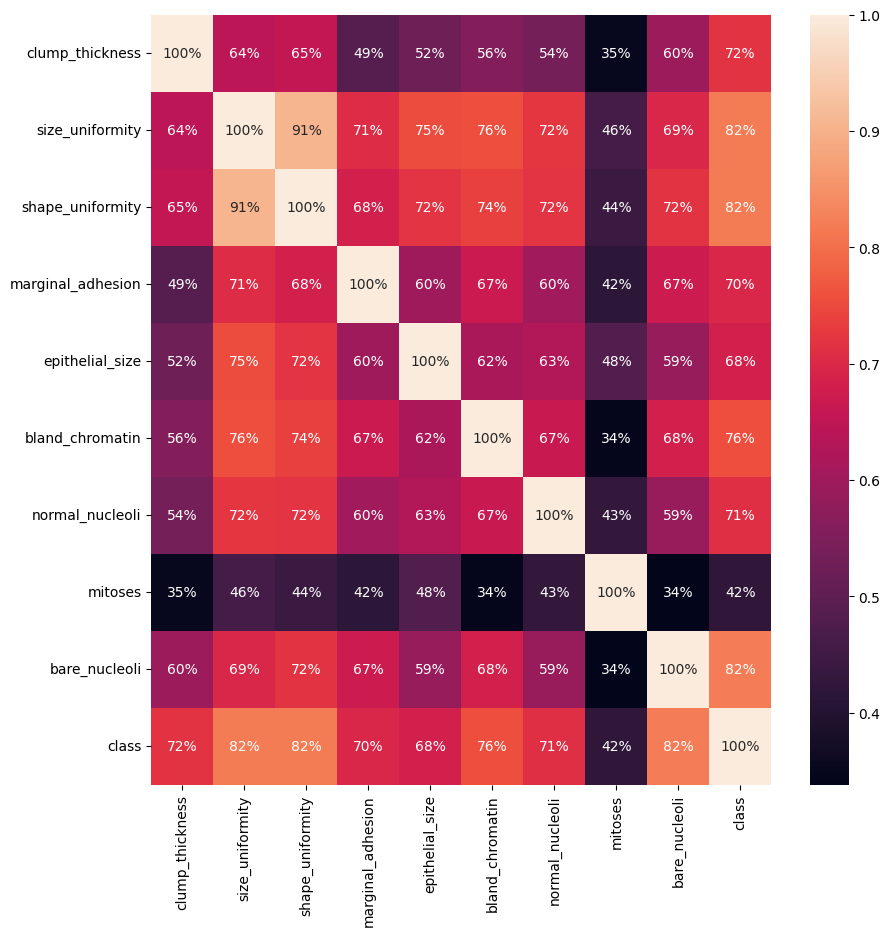

In [123]:
plt.figure(figsize = (10,10))
sb.heatmap(dataset.iloc[:,0:10].corr(), annot = True,fmt = '.0%')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'clump_thickness'),
  Text(1, 0, 'size_uniformity'),
  Text(2, 0, 'shape_uniformity'),
  Text(3, 0, 'marginal_adhesion'),
  Text(4, 0, 'epithelial_size'),
  Text(5, 0, 'bland_chromatin'),
  Text(6, 0, 'normal_nucleoli'),
  Text(7, 0, 'mitoses'),
  Text(8, 0, 'bare_nucleoli')])

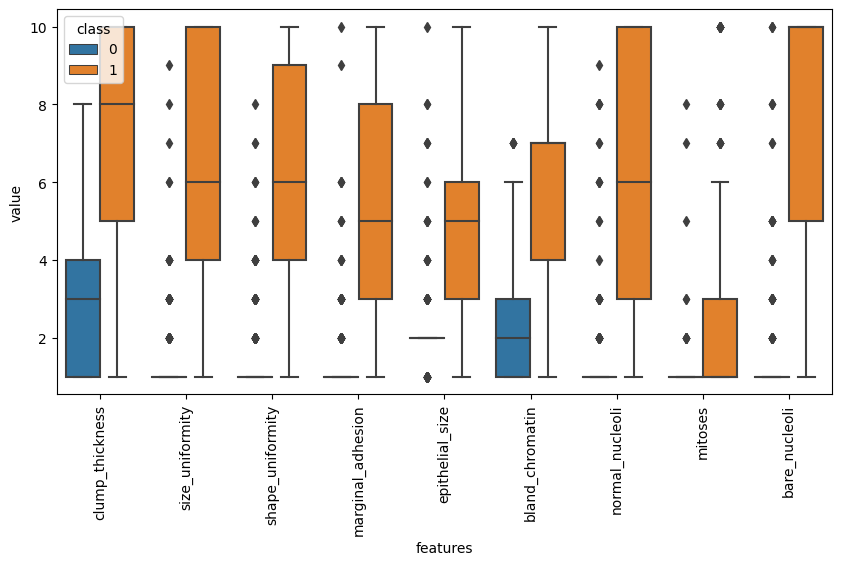

In [124]:
data = pd.melt(dataset,id_vars="class",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,5))
sb.boxplot(x="features", y="value", hue="class", data=data)
plt.xticks(rotation=90)

In [125]:
X = dataset.drop(columns='class').values
Y = dataset['class'].values
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [126]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
nb_classifier = GaussianNB()
num_folds = 10
kfold = KFold(n_splits=num_folds)
cv_results = cross_val_score(nb_classifier, X_Train, Y_Train, cv=kfold, scoring='accuracy')
print('Naive Bayes Accuracy on Training Data after 10 Fold Cross Validation is :',cv_results.mean())
print()
nb_classifier.fit(X_Train, Y_Train)
Y_Pred_nb = nb_classifier.predict(X_Test)
cm_nb = confusion_matrix(Y_Test, Y_Pred_nb)
print(cm_nb)
print()
TP_nb = cm_nb[0][0]
FP_nb = cm_nb[0][1]
TN_nb = cm_nb[1][1]
FN_nb = cm_nb[1][0]
    
print('Success Rate = ',(TP_nb+TN_nb)/(TP_nb+TN_nb+FN_nb+FP_nb))
print('Misclassificate Rate = ',(FP_nb+FN_nb)/(TP_nb+TN_nb+FN_nb+FP_nb))
print('Sensitivity/tp_rate = ', TP_nb/(TP_nb+FN_nb))
print('Specificity/tn_rate = ', TN_nb/(TN_nb+FP_nb))
print('fp rate = ',FP_nb/(TN_nb+FP_nb))
print('fn rate = ',FN_nb/(TP_nb+FN_nb))

Naive Bayes Accuracy on Training Data after 10 Fold Cross Validation is : 0.9660064935064934

[[82  7]
 [ 1 50]]

Success Rate =  0.9428571428571428
Misclassificate Rate =  0.05714285714285714
Sensitivity/tp_rate =  0.9879518072289156
Specificity/tn_rate =  0.8771929824561403
fp rate =  0.12280701754385964
fn rate =  0.012048192771084338


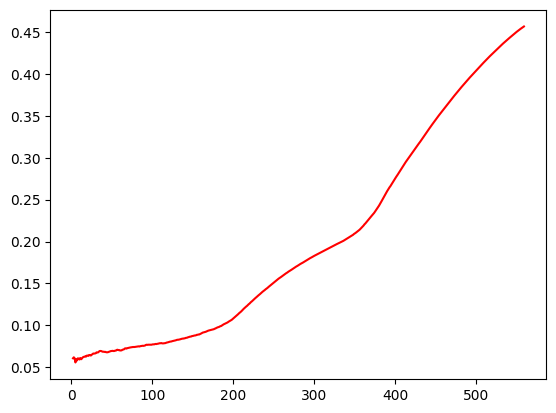

Best k parameter is  5


In [127]:
# K Nearest Neighbors Algorithm
k_min = 2
test_MAE_array = []
k_array = []
MAE = 1

for k in range(2, 560):
    model = KNeighborsRegressor(n_neighbors=k, metric = 'minkowski').fit(X_Train, Y_Train)
    Predict_Y = model.predict(X_Test)
    True_Y = Y_Test
    test_MAE = mean_absolute_error(True_Y, Predict_Y)
    if test_MAE < MAE:
        MAE = test_MAE
        k_min = k
    test_MAE_array.append(test_MAE)
    k_array.append(k)
plt.plot(k_array, test_MAE_array,'r')
plt.show()
print("Best k parameter is ",k_min )

In [128]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5,metric='minkowski')
num_folds = 10
kfold = KFold(n_splits=num_folds)
cv_results = cross_val_score(knn_classifier, X_Train, Y_Train, cv=kfold, scoring='accuracy')
print('K-Nearest Neighbors Accuracy on Training Data after 10 Fold Cross Validation is :',cv_results.mean())
knn_classifier.fit(X_Train, Y_Train)
Y_Pred_knn = knn_classifier.predict(X_Test)
print()
cm_knn = confusion_matrix(Y_Test, Y_Pred_knn)
print(cm_knn)
print()
TP_knn = cm_knn[0][0]
FP_knn = cm_knn[0][1]
TN_knn = cm_knn[1][1]
FN_knn = cm_knn[1][0]
    
print('Success Rate = ',(TP_knn+TN_knn)/(TP_knn+TN_knn+FN_knn+FP_knn))
print('Misclassificate Rate = ',(FP_knn+FN_knn)/(TP_knn+TN_knn+FN_knn+FP_knn))
print('Sensitivity/tp_rate = ', TP_knn/(TP_knn+FN_knn))
print('Specificity/tn_rate = ', TN_knn/(TN_knn+FP_knn))
print('fp rate = ',FP_knn/(TN_knn+FP_knn))
print('fn rate = ',FN_knn/(TP_knn+FN_knn))

K-Nearest Neighbors Accuracy on Training Data after 10 Fold Cross Validation is : 0.9696103896103896

[[85  4]
 [ 2 49]]

Success Rate =  0.9571428571428572
Misclassificate Rate =  0.04285714285714286
Sensitivity/tp_rate =  0.9770114942528736
Specificity/tn_rate =  0.9245283018867925
fp rate =  0.07547169811320754
fn rate =  0.022988505747126436


In [129]:
# Logistic Regression Algorithm
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
sc = StandardScaler()
X_Train_Scaled = sc.fit_transform(X_Train)
X_Test_Scaled = sc.fit_transform(X_Test)
lr_classifier = LogisticRegression()
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100]
            }

CV_lr_grid = GridSearchCV(estimator = lr_classifier, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1, cv=10)
CV_lr_grid.fit(X_Train_Scaled, Y_Train)
best_parameters = CV_lr_grid.best_params_
print('The best parameters for using this model is', best_parameters)
logistic_classifier = LogisticRegression(C = best_parameters['C'], 
                                penalty = best_parameters['penalty'], 
                                random_state = 0)
num_folds = 10
kfold = KFold(n_splits=num_folds)
cv_results = cross_val_score(logistic_classifier, X_Train_Scaled, Y_Train, cv=kfold, scoring='accuracy')
print('Logistic Regression Accuracy on Training Data with best parameters after 10 Fold Cross Validation is :',cv_results.mean())
logistic_classifier.fit(X_Train_Scaled, Y_Train)
Y_Pred_lr = logistic_classifier.predict(X_Test_Scaled)
print()
cm_lr = confusion_matrix(Y_Test, Y_Pred_lr)
print(cm_lr)
print()
TP_lr = cm_lr[0][0]
FP_lr = cm_lr[0][1]
TN_lr = cm_lr[1][1]
FN_lr = cm_lr[1][0]
    
print('Success Rate = ',(TP_lr+TN_lr)/(TP_lr+TN_lr+FN_lr+FP_lr))
print('Misclassificate Rate = ',(FP_lr+FN_lr)/(TP_lr+TN_lr+FN_lr+FP_lr))
print('Sensitivity/tp_rate = ', TP_lr/(TP_lr+FN_lr))
print('Specificity/tn_rate = ', TN_lr/(TN_lr+FP_lr))
print('fp rate = ',FP_lr/(TN_lr+FP_lr))
print('fn rate = ',FN_lr/(TP_lr+FN_lr))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
The best parameters for using this model is {'C': 0.1, 'penalty': 'l2'}
Logistic Regression Accuracy on Training Data with best parameters after 10 Fold Cross Validation is : 0.9677922077922076

[[86  3]
 [ 2 49]]

Success Rate =  0.9642857142857143
Misclassificate Rate =  0.03571428571428571
Sensitivity/tp_rate =  0.9772727272727273
Specificity/tn_rate =  0.9423076923076923
fp rate =  0.057692307692307696
fn rate =  0.022727272727272728


In [130]:
# Support Vector Machine Algorithm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svm = SVC()
param_grid = {'C': [0.001,0.01, 0.1, 1, 10,20,30,40,50,100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.02, 0.03, 0.001], 
              'kernel': ['linear']} 
grid = GridSearchCV(svm, param_grid, refit=True, verbose=1, cv=10)
grid.fit(X_Train_Scaled, Y_Train)
best_parameters = grid.best_params_
print('The best parameters for using this model is', best_parameters)
svm_classifier = SVC(C = best_parameters['C'], 
                                gamma = best_parameters['gamma'],
                                kernel = 'linear',    
                                random_state = 0,
                                probability = True)
num_folds = 10
kfold = KFold(n_splits=num_folds)
cv_results = cross_val_score(svm_classifier, X_Train_Scaled, Y_Train, cv=kfold, scoring='accuracy')
print('Support Vector Machines Accuracy on Training Data with best parameters after 10 Fold Cross Validation is :',cv_results.mean())
print()
svm_classifier.fit(X_Train_Scaled, Y_Train)
Y_Pred_svm = svm_classifier.predict(X_Test_Scaled)
cm_svm = confusion_matrix(Y_Test, Y_Pred_svm)
print(cm_svm)
print()
TP_svm = cm_svm[0][0]
FP_svm = cm_svm[0][1]
TN_svm = cm_svm[1][1]
FN_svm = cm_svm[1][0]
    
print('Success Rate = ',(TP_svm+TN_svm)/(TP_svm+TN_svm+FN_svm+FP_svm))
print('Misclassificate Rate = ',(FP_svm+FN_svm)/(TP_svm+TN_svm+FN_svm+FP_svm))
print('Sensitivity/tp_rate = ', TP_svm/(TP_svm+FN_svm))
print('Specificity/tn_rate = ', TN_svm/(TN_svm+FP_svm))
print('fp rate = ',FP_svm/(TN_svm+FP_svm))
print('fn rate = ',FN_svm/(TP_svm+FN_svm))

Fitting 10 folds for each of 90 candidates, totalling 900 fits
The best parameters for using this model is {'C': 0.01, 'gamma': 1, 'kernel': 'linear'}
Support Vector Machines Accuracy on Training Data with best parameters after 10 Fold Cross Validation is : 0.969577922077922

[[86  3]
 [ 1 50]]

Success Rate =  0.9714285714285714
Misclassificate Rate =  0.02857142857142857
Sensitivity/tp_rate =  0.9885057471264368
Specificity/tn_rate =  0.9433962264150944
fp rate =  0.05660377358490566
fn rate =  0.011494252873563218


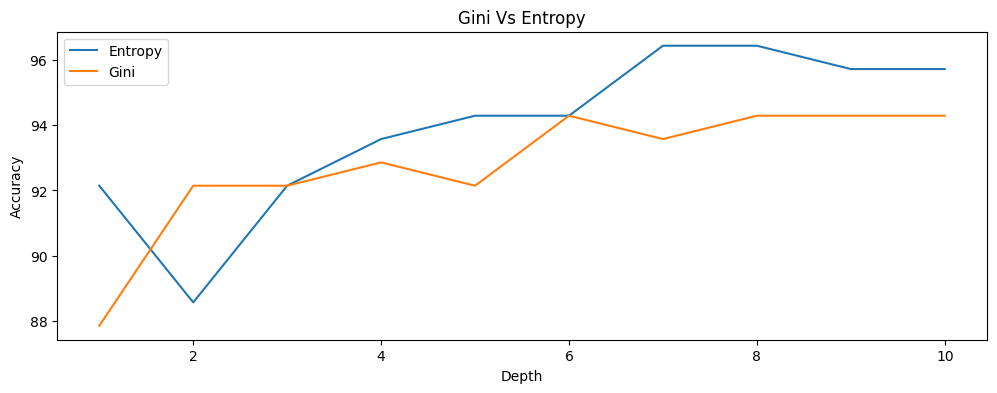

Best Criterion: Entropy, Accuracy 96.43% at depth = 7
Decision Trees Accuracy on Training Data with best parameters after 10 Fold Cross Validation is : 0.9499025974025974

[[86  3]
 [ 2 49]]

Success Rate =  0.9642857142857143
Misclassificate Rate =  0.03571428571428571
Sensitivity/tp_rate =  0.9772727272727273
Specificity/tn_rate =  0.9423076923076923
fp rate =  0.057692307692307696
fn rate =  0.022727272727272728


[Text(0.36538461538461536, 0.9166666666666666, 'x[1] <= 2.5\ngini = 0.463\nsamples = 140\nvalue = [89, 51]'),
 Text(0.15384615384615385, 0.75, 'x[6] <= 4.5\ngini = 0.069\nsamples = 84\nvalue = [81, 3]'),
 Text(0.07692307692307693, 0.5833333333333334, 'gini = 0.0\nsamples = 81\nvalue = [81, 0]'),
 Text(0.23076923076923078, 0.5833333333333334, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5769230769230769, 0.75, 'x[5] <= 4.5\ngini = 0.245\nsamples = 56\nvalue = [8, 48]'),
 Text(0.38461538461538464, 0.5833333333333334, 'x[0] <= 5.5\ngini = 0.475\nsamples = 18\nvalue = [7, 11]'),
 Text(0.23076923076923078, 0.4166666666666667, 'x[3] <= 8.0\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.15384615384615385, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.3076923076923077, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5384615384615384, 0.4166666666666667, 'x[8] <= 1.5\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.46153846153846156, 0.25, 'x[0] <= 7.5

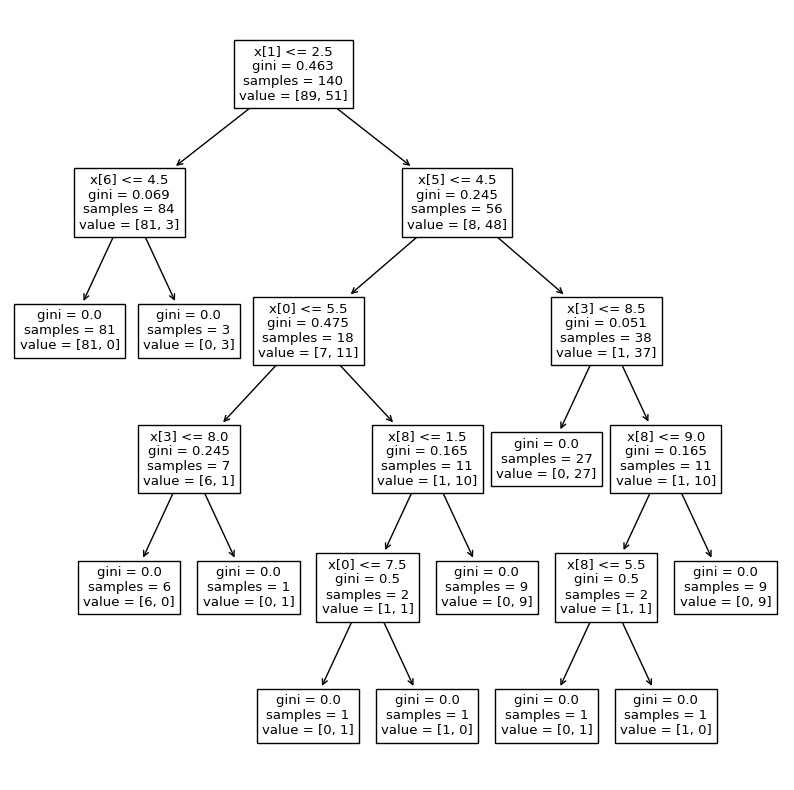

In [131]:
# Decision Trees Algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
y_entropy = []
y_gini = []
for depth in range(len(dataset.columns)):
    classifier_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth+1,random_state=0)
    classifier_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth+1,random_state=0)
    classifier_entropy.fit(X_Train_Scaled, Y_Train)
    classifier_gini.fit(X_Train_Scaled, Y_Train)
    y_entropy.append(classifier_entropy.score(X_Test_Scaled, Y_Test)*100)
    y_gini.append(classifier_gini.score(X_Test_Scaled, Y_Test)*100)
    
plt.figure(figsize=(12,4))
plt.plot(range(1, len(dataset.columns)+1), y_entropy)
plt.plot(range(1, len(dataset.columns)+1), y_gini)
plt.title('Gini Vs Entropy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend(['Entropy', 'Gini'])
plt.show()

best_accuracy = np.amax(y_entropy), np.amax(y_gini)
best_criterion = ['Entropy', 'Gini']

print('Best Criterion: {}, Accuracy {:.2f}% at depth = {}'.format(best_criterion[np.argmax(best_accuracy)], 
                                                                  np.amax(best_accuracy), 
                                                                  np.argmax(y_gini)+1 if np.amax(y_gini) > np.amax(y_entropy) else np.argmax(y_entropy)+1))
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, random_state= 0)
num_folds = 10
kfold = KFold(n_splits=num_folds)
cv_results = cross_val_score(dt_classifier, X_Train_Scaled, Y_Train, cv=kfold, scoring='accuracy')
print('Decision Trees Accuracy on Training Data with best parameters after 10 Fold Cross Validation is :',cv_results.mean())
print()
dt_classifier.fit(X_Train_Scaled, Y_Train)
Y_Pred_dt = dt_classifier.predict(X_Test_Scaled)
cm_dt = confusion_matrix(Y_Test, Y_Pred_dt)
print(cm_dt)
print()
TP_dt = cm_dt[0][0]
FP_dt = cm_dt[0][1]
TN_dt = cm_dt[1][1]
FN_dt = cm_dt[1][0]
print('Success Rate = ',(TP_dt+TN_dt)/(TP_dt+TN_dt+FN_dt+FP_dt))
print('Misclassificate Rate = ',(FP_dt+FN_dt)/(TP_dt+TN_dt+FN_dt+FP_dt))
print('Sensitivity/tp_rate = ', TP_dt/(TP_dt+FN_dt))
print('Specificity/tn_rate = ', TN_dt/(TN_dt+FP_dt))
print('fp rate = ',FP_dt/(TN_dt+FP_dt))
print('fn rate = ',FN_dt/(TP_dt+FN_dt))

plt.figure(figsize = (10,10))
tree.plot_tree(classifier_gini.fit(X_Test, Y_Test))

In [132]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
num_folds = 10
kfold = KFold(n_splits=num_folds)
for i in range(1, 21):
    for j in range(1,10):
        rf = RandomForestClassifier(n_estimators = i, random_state=0, max_depth = j)
        score = cross_val_score(rf, X_Train_Scaled, Y_Train, scoring='accuracy' ,cv=kfold).mean()
        print("N_Estimators = " + str(i) + " : Depth = "+ str(j) + " : Accuracy = " + str(score))

N_Estimators = 1 : Depth = 1 : Accuracy = 0.9337662337662337
N_Estimators = 1 : Depth = 2 : Accuracy = 0.9462987012987012
N_Estimators = 1 : Depth = 3 : Accuracy = 0.9516558441558441
N_Estimators = 1 : Depth = 4 : Accuracy = 0.9409415584415586
N_Estimators = 1 : Depth = 5 : Accuracy = 0.9373701298701299
N_Estimators = 1 : Depth = 6 : Accuracy = 0.9480194805194804
N_Estimators = 1 : Depth = 7 : Accuracy = 0.9444805194805195
N_Estimators = 1 : Depth = 8 : Accuracy = 0.9426623376623378
N_Estimators = 1 : Depth = 9 : Accuracy = 0.9426948051948051
N_Estimators = 2 : Depth = 1 : Accuracy = 0.9159090909090908
N_Estimators = 2 : Depth = 2 : Accuracy = 0.9445454545454546
N_Estimators = 2 : Depth = 3 : Accuracy = 0.9516233766233766
N_Estimators = 2 : Depth = 4 : Accuracy = 0.9535389610389611
N_Estimators = 2 : Depth = 5 : Accuracy = 0.9517532467532469
N_Estimators = 2 : Depth = 6 : Accuracy = 0.9534415584415585
N_Estimators = 2 : Depth = 7 : Accuracy = 0.9446103896103896
N_Estimators = 2 : Depth

In [133]:
# Training the algorithm for best parameters.
# There are 4 cases in which the same maximum training accuracy.
# The 4 cases are - N = 12,14,15,17 and Depth = 5.
N_Estimators = [12,14,15,17]
# Calculating the testing accuracy for the best obtained N_Estimators and Depth and then finding the best testing accuracy.
for i in N_Estimators:
    rfc_classifier = RandomForestClassifier(n_estimators = i, max_depth = 5, random_state = 0)                      
    rfc_classifier.fit(X_Train_Scaled, Y_Train)
    Y_Pred_rfc = rfc_classifier.predict(X_Test_Scaled)
    cm_rfc = confusion_matrix(Y_Test, Y_Pred_rfc)
    TP_rfc = cm_rfc[0][0]
    FP_rfc = cm_rfc[0][1]
    TN_rfc = cm_rfc[1][1]
    FN_rfc = cm_rfc[1][0]
    print('Success Rate = ',(TP_rfc+TN_rfc)/(TP_rfc+TN_rfc+FN_rfc+FP_rfc))
    

Success Rate =  0.9642857142857143
Success Rate =  0.9571428571428572
Success Rate =  0.9642857142857143
Success Rate =  0.9571428571428572


In [134]:
rfc_classifier_final = RandomForestClassifier(n_estimators = 15, max_depth = 5, random_state = 0)       
num_folds = 10
kfold = KFold(n_splits=num_folds)
cv_results = cross_val_score(rfc_classifier_final, X_Train_Scaled, Y_Train, cv=kfold, scoring='accuracy')
print('Random Forest Accuracy on Training Data with best parameters after 10 Fold Cross Validation is :',cv_results.mean())
print()
rfc_classifier_final.fit(X_Train_Scaled, Y_Train)
Y_Pred_rfc = rfc_classifier_final.predict(X_Test_Scaled)
cm_rfc = confusion_matrix(Y_Test, Y_Pred_rfc)
print(cm_rfc)
TP_rfc = cm_rfc[0][0]
FP_rfc = cm_rfc[0][1]
TN_rfc = cm_rfc[1][1]
FN_rfc = cm_rfc[1][0]
print()    
print('Success Rate = ',(TP_rfc+TN_rfc)/(TP_rfc+TN_rfc+FN_rfc+FP_rfc))
print('Misclassificate Rate = ',(FP_rfc+FN_rfc)/(TP_rfc+TN_rfc+FN_rfc+FP_rfc))
print('Sensitivity/tp_rate = ', TP_rfc/(TP_rfc+FN_rfc))
print('Specificity/tn_rate = ', TN_rfc/(TN_rfc+FP_rfc))
print('fp rate = ',FP_rfc/(TN_rfc+FP_rfc))
print('fn rate = ',FN_rfc/(TP_rfc+FN_rfc))
print()

Random Forest Accuracy on Training Data with best parameters after 10 Fold Cross Validation is : 0.9731818181818183

[[85  4]
 [ 1 50]]

Success Rate =  0.9642857142857143
Misclassificate Rate =  0.03571428571428571
Sensitivity/tp_rate =  0.9883720930232558
Specificity/tn_rate =  0.9259259259259259
fp rate =  0.07407407407407407
fn rate =  0.011627906976744186



In [135]:
# Neural Networks
from sklearn.neural_network import MLPClassifier
acc = []
learning_rate = [1e-5,1e-4,1e-3,1e-2,1e-1,1]
for i in range(10,90,10):
    for j in learning_rate:
        nn = MLPClassifier(hidden_layer_sizes=(9,2),
                      learning_rate_init = j,
                      max_iter = i,
                      random_state = 33)
        score = cross_val_score(nn, X_Train_Scaled, Y_Train, scoring='accuracy' ,cv=kfold).mean()
        print("Epochs/Number_Of_Iterations = " + str(i) + " : Learning_Rate = "+ str(j) + " : Accuracy = " + str(score))     

Epochs/Number_Of_Iterations = 10 : Learning_Rate = 1e-05 : Accuracy = 0.6673701298701299
Epochs/Number_Of_Iterations = 10 : Learning_Rate = 0.0001 : Accuracy = 0.6762987012987014
Epochs/Number_Of_Iterations = 10 : Learning_Rate = 0.001 : Accuracy = 0.7228246753246754
Epochs/Number_Of_Iterations = 10 : Learning_Rate = 0.01 : Accuracy = 0.9624350649350648
Epochs/Number_Of_Iterations = 10 : Learning_Rate = 0.1 : Accuracy = 0.9677272727272728
Epochs/Number_Of_Iterations = 10 : Learning_Rate = 1 : Accuracy = 0.6923051948051949
Epochs/Number_Of_Iterations = 20 : Learning_Rate = 1e-05 : Accuracy = 0.6691558441558442
Epochs/Number_Of_Iterations = 20 : Learning_Rate = 0.0001 : Accuracy = 0.6816883116883117
Epochs/Number_Of_Iterations = 20 : Learning_Rate = 0.001 : Accuracy = 0.7747077922077922
Epochs/Number_Of_Iterations = 20 : Learning_Rate = 0.01 : Accuracy = 0.9660064935064934
Epochs/Number_Of_Iterations = 20 : Learning_Rate = 0.1 : Accuracy = 0.9678246753246753
Epochs/Number_Of_Iterations =

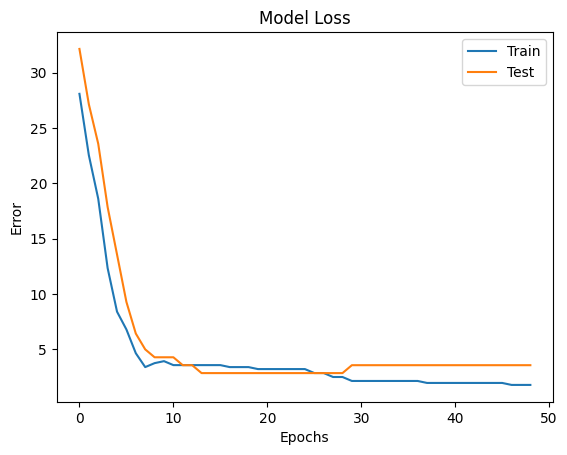

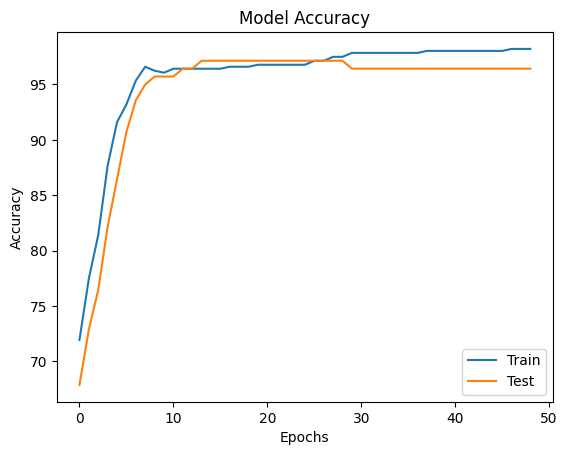

In [136]:
# The best accuracy on training data is achieved when learning rate is 1e-2.
# Keeping the learning rate as 1e-2, we iterate through number of epochs/iterations to find the best testing accuracy and 
# minimum overfitting of training data. 

training_acc = []
testing_acc = []
for i in range(1,50):
    model = MLPClassifier(hidden_layer_sizes=(9,2),
                      learning_rate_init = 1e-2,
                      max_iter = i,
                      random_state = 33)
    model.fit(X_Train_Scaled,Y_Train)
    prd_r = model.predict(X_Test_Scaled)
    test_acc = metrics.accuracy_score(Y_Test, prd_r) * 100.
    train_acc = model.score(X_Train_Scaled,Y_Train) *100
    testing_acc.append(test_acc)
    training_acc.append(train_acc)
testing_error = [100-x for x in testing_acc]  
training_error = [100-x for x in training_acc]
plt.title('Model Loss')
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.plot(training_error,label = 'Train')
plt.plot(testing_error, label = 'Test')  
plt.legend(loc='upper right')
plt.show()    
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.plot(training_acc,label = 'Train')
plt.plot(testing_acc, label = 'Test')  
plt.legend(loc='lower right')
plt.show() 

In [137]:
# Optimum number of epochs as seen from the graph can be chosen as 20 (Same testing accuracy for epochs between 14 and 29)
MLP_classifier = MLPClassifier(hidden_layer_sizes=(9,2),
                      learning_rate_init = 1e-2,
                      max_iter = 20,
                      random_state = 33)
num_folds = 10
kfold = KFold(n_splits=num_folds)
cv_results = cross_val_score(MLP_classifier, X_Train_Scaled, Y_Train, cv=kfold, scoring='accuracy')
print('Neural Networks Accuracy on Training Data with best parameters after 10 Fold Cross Validation is :',cv_results.mean())
print()
MLP_classifier.fit(X_Train_Scaled, Y_Train)
Y_Pred_mlp = MLP_classifier.predict(X_Test_Scaled)
cm_mlp = confusion_matrix(Y_Test, Y_Pred_mlp)
print(cm_mlp)
TP_mlp = cm_mlp[0][0]
FP_mlp = cm_mlp[0][1]
TN_mlp = cm_mlp[1][1]
FN_mlp = cm_mlp[1][0]
print()    
print('Success Rate = ',(TP_mlp+TN_mlp)/(TP_mlp+TN_mlp+FN_mlp+FP_mlp))
print('Misclassificate Rate = ',(FP_mlp+FN_mlp)/(TP_mlp+TN_mlp+FN_mlp+FP_mlp))
print('Sensitivity/tp_rate = ', TP_mlp/(TP_mlp+FN_mlp))
print('Specificity/tn_rate = ', TN_mlp/(TN_mlp+FP_mlp))
print('fp rate = ',FP_mlp/(TN_mlp+FP_mlp))
print('fn rate = ',FN_mlp/(TP_mlp+FN_mlp))
print()

Neural Networks Accuracy on Training Data with best parameters after 10 Fold Cross Validation is : 0.9660064935064934

[[86  3]
 [ 1 50]]

Success Rate =  0.9714285714285714
Misclassificate Rate =  0.02857142857142857
Sensitivity/tp_rate =  0.9885057471264368
Specificity/tn_rate =  0.9433962264150944
fp rate =  0.05660377358490566
fn rate =  0.011494252873563218



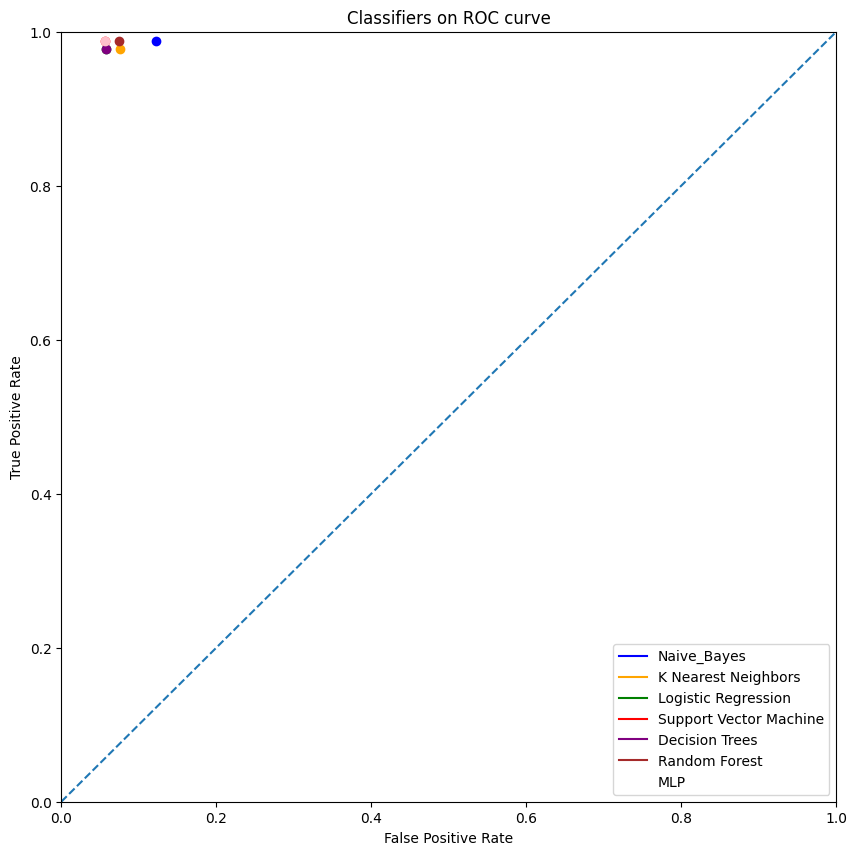

In [138]:
#ROC Curves for different Classifiers
from sklearn import metrics
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.plot([0, 1], [0, 1], ls="--")
colors = ("blue","green","orange","red","purple","brown","pink")
tp_array = [TP_nb/(TP_nb+FN_nb),TP_lr/(TP_lr+FN_lr),TP_knn/(TP_knn+FN_knn), TP_svm/(TP_svm+FN_svm),TP_dt/(TP_dt+FN_dt),TP_rfc/(TP_rfc+FN_rfc),TP_mlp/(TP_mlp+FN_mlp)]
fp_array = [FP_nb/(TN_nb+FP_nb),FP_lr/(TN_lr+FP_lr),FP_knn/(TN_knn+FP_knn), FP_svm/(TN_svm+FP_svm), FP_dt/(TN_dt+FP_dt),FP_rfc/(FP_rfc+TN_rfc),FP_mlp/(FP_mlp+TN_mlp)]
for x,y,color in zip(tp_array,fp_array,colors):
    plt.scatter(y,x,c=color)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Classifiers on ROC curve')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
ax1.plot(tp_array[0], fp_array[0] , label= "Naive_Bayes" , color = "blue")
ax1.plot(tp_array[2], fp_array[2] , label= "K Nearest Neighbors", color = "orange")
ax1.plot(tp_array[1], fp_array[1] , label= "Logistic Regression", color = "green")
ax1.plot(tp_array[3], fp_array[3] , label= "Support Vector Machine", color = "red")
ax1.plot(tp_array[4], fp_array[4] , label= "Decision Trees", color = "purple")
ax1.plot(tp_array[5], fp_array[5] , label= "Random Forest", color = "brown")
ax1.plot(tp_array[6], fp_array[6] , label= "MLP", color = "white")
ax1.legend(loc="lower right")
plt.show()
# Pink and Red Overlap

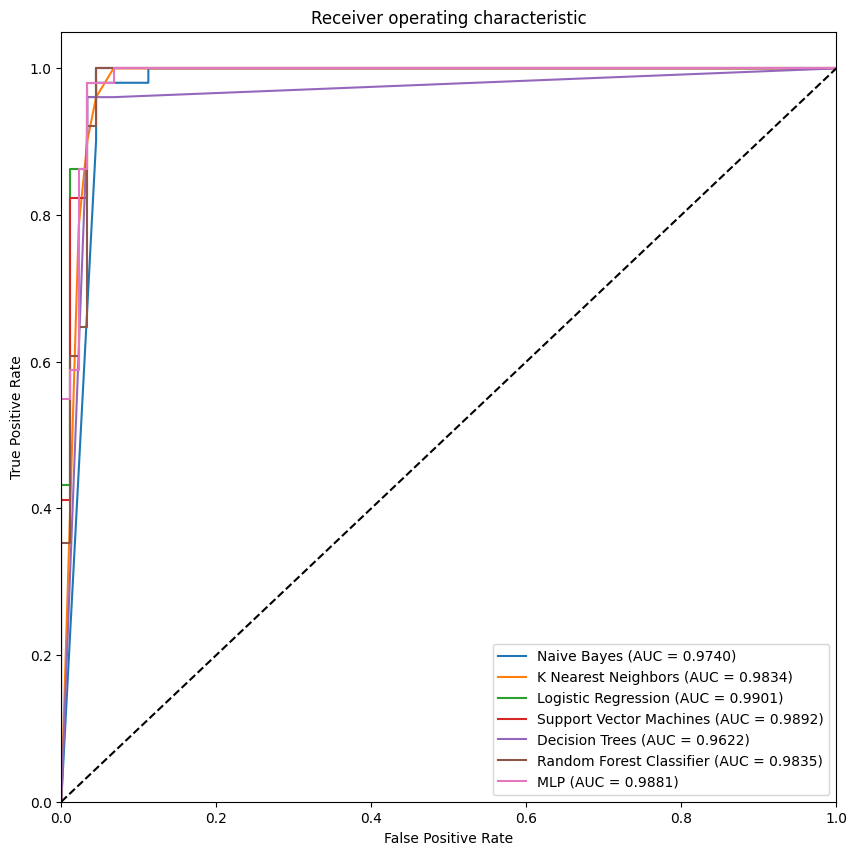

In [139]:
from numpy import sqrt
from numpy import argmax
# calculate the fpr and tpr for all thresholds of the classification
nb_probs = nb_classifier.predict_proba(X_Test)
knn_probs = knn_classifier.predict_proba(X_Test)
lr_probs = logistic_classifier.predict_proba(X_Test_Scaled)
svm_probs = svm_classifier.predict_proba(X_Test_Scaled)
dt_probs = dt_classifier.predict_proba(X_Test_Scaled)
rfc_probs = rfc_classifier_final.predict_proba(X_Test_Scaled)
mlp_probs = MLP_classifier.predict_proba(X_Test_Scaled)

preds_nb = nb_probs[:,1]
preds_knn = knn_probs[:,1]
preds_lr = lr_probs[:,1]
preds_svm = svm_probs[:,1]
preds_dt = dt_probs[:,1]
preds_rfc = rfc_probs[:,1]
preds_mlp = mlp_probs[:,1]

fpr_nb, tpr_nb, threshold_nb = metrics.roc_curve(Y_Test, preds_nb)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)
fpr_knn, tpr_knn, threshold_knn = metrics.roc_curve(Y_Test, preds_knn)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
fpr_lr, tpr_lr, threshold_lr = metrics.roc_curve(Y_Test, preds_lr)
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)
fpr_svm, tpr_svm, threshold_svm = metrics.roc_curve(Y_Test, preds_svm)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
fpr_dt, tpr_dt, threshold_dt = metrics.roc_curve(Y_Test, preds_dt)
roc_auc_dt = metrics.auc(fpr_dt, tpr_dt)
fpr_rfc, tpr_rfc, threshold_rfc = metrics.roc_curve(Y_Test, preds_rfc)
roc_auc_rfc = metrics.auc(fpr_rfc, tpr_rfc)
fpr_mlp, tpr_mlp, threshold_mlp = metrics.roc_curve(Y_Test, preds_mlp)
roc_auc_mlp = metrics.auc(fpr_mlp, tpr_mlp)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characterstics')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = %0.4f)' % (roc_auc_nb))
plt.plot(fpr_knn, tpr_knn, label='K Nearest Neighbors (AUC = %0.4f)' % (roc_auc_knn))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.4f)' % (roc_auc_lr))
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machines (AUC = %0.4f)' % (roc_auc_svm))
plt.plot(fpr_dt, tpr_dt, label='Decision Trees (AUC = %0.4f)' % (roc_auc_dt))
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest Classifier (AUC = %0.4f)' % (roc_auc_rfc))
plt.plot(fpr_mlp, tpr_mlp, label='MLP (AUC = %0.4f)' % (roc_auc_mlp))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [140]:
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
roc_auc_dt = metrics.auc(fpr_dt, tpr_dt)
roc_auc_rfc = metrics.auc(fpr_rfc, tpr_rfc)
roc_auc_mlp = metrics.auc(fpr_mlp, tpr_mlp)
print("Naive Bayes AUC = ",roc_auc_nb)
print("K Nearest Neighbors AUC = ",roc_auc_knn)
print("Logistic Regression AUC = ",roc_auc_lr)
print("Support Vector Machine AUC = ",roc_auc_svm)
print("Decision Trees AUC = ",roc_auc_dt)
print("Random Forest AUC = ",roc_auc_rfc)
print("MLP AUC = ",roc_auc_mlp)

Naive Bayes AUC =  0.9740030843798193
K Nearest Neighbors AUC =  0.9833663802599693
Logistic Regression AUC =  0.9900859220092532
Support Vector Machine AUC =  0.9892046706322979
Decision Trees AUC =  0.9622163472130427
Random Forest AUC =  0.9834765366820885
MLP AUC =  0.9881031064111038
